# Analyze RNA velocity for mouse hippocampal dentate gyrus neurogenesis data

This tutorial shows how to analyze RNA velocity using cellDancer, including:: (1) model estimation, (2) deriving cell fates in embedding level, and (3) pseudotime estimation.
 

Here is the case study for the mouse hippocampal dentate gyrus neurogenesis data, we followed the gene and cell filtering methods of [La Manno et al.](https://www.nature.com/articles/s41587-020-0591-3), and selected 18,140 cells with 2,159 genes.

## Import packages

To run the notebook locally, [Getting Started](link) could be referred to install the environment and dependencies.

In [27]:
%load_ext autoreload
%autoreload 2

# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.plotting import graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load mouse hippocampal dentate gyrus neurogenesis data

The input data for cellDancer contains the abundances of unspliced RNA and spliced RNA. For the detail of obtaining the dataset and pre-processing, please refer to [Data Preprocessing](http:link).

The data of mouse hippocampal dentate gyrus neurogenesis could be downloaded from [DentateGyrus_cell_type_u_s.csv](http:xxx/xxx/DentateGyrus_cell_type_u_s.csv). It could be loaded by ```pd.read_csv('your_path/DentateGyrus_cell_type_u_s.csv')```. To load your own data, the dataframe should contain columns 'gene_name', 'unsplice', 'splice' ,'cellID' ,'clusters' ,'embedding1' , and 'embedding2.' For a detailed description of the data structure, [Data Preprocessing](Data_Preprocessing.html) could be referred to.

In [9]:
%autoreload 2
cell_type_u_s_path="/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv"
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

gene_name  unsplice    splice                     cellID  \
0            Rgs20  0.069478  0.021971  10X83_2:AAACGGGGTCTCTTTAx   
1            Rgs20  0.085834  0.016256  10X83_2:AACCATGGTTCAACCAx   
2            Rgs20  0.068644  0.047774  10X83_2:AACACGTTCTGAAAGAx   
3            Rgs20  0.045387  0.018101  10X83_2:AAAGATGCATTGAGCTx   
4            Rgs20  0.040457  0.012846  10X83_2:AACCATGTCTACTTACx   
...            ...       ...       ...                        ...   
39164255     Gpm6b  0.876650  1.276089  10X84_3:TTTCCTCCACCATCCTx   
39164256     Gpm6b  2.024897  5.152006  10X84_3:TTTGTCACATGAAGTAx   
39164257     Gpm6b  1.848051  1.491445  10X84_3:TTTCCTCCACGGTAAGx   
39164258     Gpm6b  0.696361  1.189091  10X84_3:TTTGTCAAGCGTCAAGx   
39164259     Gpm6b  0.739348  1.239052  10X84_3:TTTCCTCGTGAAAGAGx   

             clusters  embedding1  embedding2  
0         ImmGranule2   18.931086   -1.862429  
1         ImmGranule2   18.419891   -1.282895  
2             CA2-3-4    2.369887   16.868419  
3                  CA   -5.351040   10.676485  
4             CA1-Sub   -6.189126   11.754900  
...               ...         ...         ...  
39164255  ImmGranule1   10.812611   -2.487668  
39164256      CA2-3-4    8.246204   23.482788  
39164257         nIPC   -3.441272   -4.917364  
39164258  ImmGranule2   16.394199   -6.143549  
39164259  ImmGranule2   17.490857   -4.130190  

[39164260 rows x 7 columns]

## Velocity estimation of sample genes

```celldancer.velocity_estimation.velocity()``` could be used to estimate the velocity. 

Here, 30 genes in ```gene_list``` will be estimated as an example. By default, the Deep Neural Network (DNN) will run at most 200 epochs. It will check the loss every 10 epochs. If the loss has no improvement in 3 checked epochs, the epoch will end, and the network at that time will be used for the estimation. If supported by equipment, parallel computing could be used to improve the speed, ```n_jobs``` could be adjusted according to demand.

After fitting, the predicted unspliced and spliced reads, alpha, beta, and gamma will be added to the original dataframe and returned.

In [13]:
%autoreload 2

gene_list=['Psd3', 'Dcx', 'Syt11', 'Diaph3', 'Slc1a3', 'Gria1', 'Dctn3', 'Map1b', 'Camk2a', 'Gpm6b', 'Sez6l', 'Evl', 'Astn1', 'Ank2', 'Klf7', 'Tbc1d16', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Lhx9', 'Slc4a4', 'Ppfia2', 'Kcnip1', 'Ptpro', 'Ntrk2', 'Gnao1', 'Cadm1', 'Mef2c', 'Sptbn1', 'Ncald']
gene_list=['Evl']
loss_df, cellDancer_df=cd.velocity_estimation.velocity(cell_type_u_s,\
                                                       gene_list=gene_list,\
                                                       permutation_ratio=0.1,\
                                                       norm_u_s=False,\
                                                       norm_cell_distribution=False,
                                                       n_jobs=1)
cellDancer_df

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-11 21-47-48 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]              
                                                                                

cellIndex gene_name  unsplice    splice  unsplice_predict  \
0              0       Evl  0.485599  2.299388          0.457104   
1              1       Evl  0.530425  2.310178          0.498971   
2              2       Evl  0.430023  2.329211          0.404711   
3              3       Evl  0.692199  2.524527          0.641542   
4              4       Evl  0.772578  2.822268          0.704436   
...          ...       ...       ...       ...               ...   
18135      18135       Evl  0.561638  2.297902          0.528708   
18136      18136       Evl  0.300227  2.070687          0.290318   
18137      18137       Evl  0.523064  0.759086          0.519154   
18138      18138       Evl  0.633974  2.393830          0.592752   
18139      18139       Evl  0.647398  2.256770          0.610191   

       splice_predict     alpha      beta     gamma      loss  \
0            2.199498  0.303860  0.743106  0.243818  0.083961   
1            2.226289  0.330980  0.742590  0.243127  0.083961   
2            2.203645  0.269976  0.745541  0.245462  0.083961   
3            2.475416  0.417007  0.748803  0.244220  0.083961   
4            2.765265  0.450105  0.759003  0.248167  0.083961   
...               ...       ...       ...       ...       ...   
18135        2.227774  0.350662  0.741619  0.242298  0.083961   
18136        1.929286  0.202147  0.739322  0.243767  0.083961   
18137        0.858438  0.349858  0.683812  0.209429  0.083961   
18138        2.339195  0.389475  0.744381  0.242786  0.083961   
18139        2.225319  0.404150  0.739213  0.239930  0.083961   

                          cellID     clusters  embedding1  embedding2  
0      10X83_2:AAACGGGGTCTCTTTAx  ImmGranule2   18.931086   -1.862429  
1      10X83_2:AACCATGGTTCAACCAx  ImmGranule2   18.419891   -1.282895  
2      10X83_2:AACACGTTCTGAAAGAx      CA2-3-4    2.369887   16.868419  
3      10X83_2:AAAGATGCATTGAGCTx           CA   -5.351040   10.676485  
4      10X83_2:AACCATGTCTACTTACx      CA1-Sub   -6.189126   11.754900  
...                          ...          ...         ...         ...  
18135  10X84_3:TTTCCTCCACCATCCTx  ImmGranule1   10.812611   -2.487668  
18136  10X84_3:TTTGTCACATGAAGTAx      CA2-3-4    8.246204   23.482788  
18137  10X84_3:TTTCCTCCACGGTAAGx         nIPC   -3.441272   -4.917364  
18138  10X84_3:TTTGTCAAGCGTCAAGx  ImmGranule2   16.394199   -6.143549  
18139  10X84_3:TTTCCTCGTGAAAGAGx  ImmGranule2   17.490857   -4.130190  

[18140 rows x 14 columns]

## Visualization of sample genes' prediction

Let’s visualize the predicted results pf each gene with ```celldancer.cdplt.gene.scatter_gene()```.

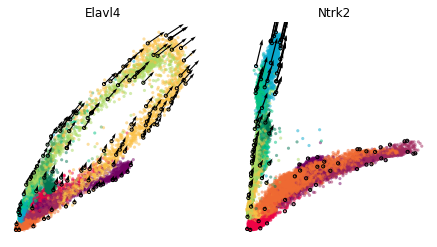

In [75]:
%autoreload 2

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 10,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load the velocity estimation result of all 2,159 genes

To display the prediction in embedding space and to estimate pseudotime by using all genes, all the 2159 genes have already been predicted and could be downloaded from [DentateGyrus_cellDancer_estimation.csv](link). The .csv file could be loaded by ```pd.read_csv()```.

In [28]:
cellDancer_df

cellIndex gene_name  unsplice    splice  unsplice_predict  \
0              0       Evl  0.485599  2.299388          0.457104   
1              1       Evl  0.530425  2.310178          0.498971   
2              2       Evl  0.430023  2.329211          0.404711   
3              3       Evl  0.692199  2.524527          0.641542   
4              4       Evl  0.772578  2.822268          0.704436   
...          ...       ...       ...       ...               ...   
18135      18135       Evl  0.561638  2.297902          0.528708   
18136      18136       Evl  0.300227  2.070687          0.290318   
18137      18137       Evl  0.523064  0.759086          0.519154   
18138      18138       Evl  0.633974  2.393830          0.592752   
18139      18139       Evl  0.647398  2.256770          0.610191   

       splice_predict     alpha      beta     gamma      loss  \
0            2.199498  0.303860  0.743106  0.243818  0.083961   
1            2.226289  0.330980  0.742590  0.243127  0.083961   
2            2.203645  0.269976  0.745541  0.245462  0.083961   
3            2.475416  0.417007  0.748803  0.244220  0.083961   
4            2.765265  0.450105  0.759003  0.248167  0.083961   
...               ...       ...       ...       ...       ...   
18135        2.227774  0.350662  0.741619  0.242298  0.083961   
18136        1.929286  0.202147  0.739322  0.243767  0.083961   
18137        0.858438  0.349858  0.683812  0.209429  0.083961   
18138        2.339195  0.389475  0.744381  0.242786  0.083961   
18139        2.225319  0.404150  0.739213  0.239930  0.083961   

                          cellID     clusters  embedding1  embedding2  
0      10X83_2:AAACGGGGTCTCTTTAx  ImmGranule2   18.931086   -1.862429  
1      10X83_2:AACCATGGTTCAACCAx  ImmGranule2   18.419891   -1.282895  
2      10X83_2:AACACGTTCTGAAAGAx      CA2-3-4    2.369887   16.868419  
3      10X83_2:AAAGATGCATTGAGCTx           CA   -5.351040   10.676485  
4      10X83_2:AACCATGTCTACTTACx      CA1-Sub   -6.189126   11.754900  
...                          ...          ...         ...         ...  
18135  10X84_3:TTTCCTCCACCATCCTx  ImmGranule1   10.812611   -2.487668  
18136  10X84_3:TTTGTCACATGAAGTAx      CA2-3-4    8.246204   23.482788  
18137  10X84_3:TTTCCTCCACGGTAAGx         nIPC   -3.441272   -4.917364  
18138  10X84_3:TTTGTCAAGCGTCAAGx  ImmGranule2   16.394199   -6.143549  
18139  10X84_3:TTTCCTCGTGAAAGAGx  ImmGranule2   17.490857   -4.130190  

[18140 rows x 14 columns]

In [35]:
# load the prediction result of all genes
cellDancer_df_file = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)

In [51]:
cellDancer_df_bkup=cellDancer_df.copy()

In [3]:
loss=cellDancer_df[['gene_name','loss']].drop_duplicates()

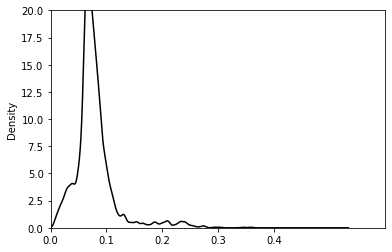

/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


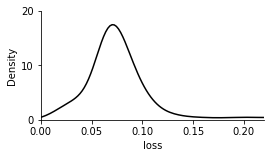

In [187]:

import numpy as np
my_x_ticks = np.arange(0, 0.5, 0.1)
# my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
# plt.yticks(my_y_ticks)


plt.ylim(0,20)

plt.xlim(0,0.6)
loss.loss.plot.kde(bw_method=0.1, color='black')
plt.show()
import seaborn as sns

plt.figure(figsize=(4,2))
ax = plt.subplot(111)
plt.xlim(0,0.22)
my_x_ticks = np.arange(0, 0.22, 0.05)
my_y_ticks = np.arange(0, 25, 10)
plt.xticks(my_x_ticks)
plt.ylim(0,20)
plt.yticks(my_y_ticks)

sns.kdeplot(data=loss, bw=0.3,x="loss",color='black')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/loss.png',dpi=300)

In [157]:
loss.max()

gene_name      Zyg11b
loss         0.358541
dtype: object

In [6]:
unmax=cellDancer_df[['gene_name','unsplice']].groupby('gene_name').max()

In [66]:
unmax_point1=unmax[unmax.unsplice>0.1]

In [67]:
gene_list=list(unmax_point1.index)

In [68]:
len(gene_list)

1478

In [37]:
cellDancer_df_point1=cellDancer_df[cellDancer_df.gene_name.isin(gene_list)]
cellDancer_df_point1_loss=cellDancer_df_point1[['gene_name','loss']].drop_duplicates()
cellDancer_df_point1_loss_sort=cellDancer_df_point1_loss.sort_values('loss')
cellDancer_df_point1_loss_sort

gene_name      loss
14802240  A930009A15Rik  0.007828
24235040          Troap  0.008210
9160700         Depdc1a  0.008336
24434580           Pif1  0.009029
26629520         Iqgap3  0.010073
...                 ...       ...
4389880          Atp1a2  0.240052
12026820          Cox8a  0.242704
22965240         Tmsb10  0.293683
16416700           Gfap  0.344773
7364840            Nrgn  0.358541

[1478 rows x 2 columns]

In [38]:
loss_top500=list(cellDancer_df_point1_loss_sort.gene_name)[0:500]

In [39]:
import shutil
path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/all/'
des='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/loss500_in_point1_1478_in_data0604/'
for i in loss_top500:
    try:
        shutil.copyfile((path+i+'.pdf'), (des+i+'.pdf'))
    except:
        print(i)


Chst8
Slc6a15
Egr1


In [91]:
cellDancer_df=cellDancer_df_bkup.copy()

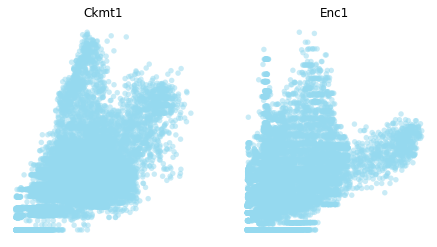

In [189]:
%autoreload 2
gene_list=['Ckmt1','Enc1']
ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 30,
        velocity=False,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cost_gene/gene.png',dpi=300)
plt.show()



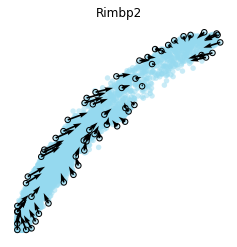

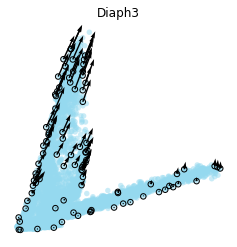

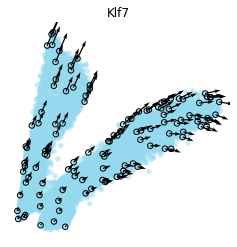

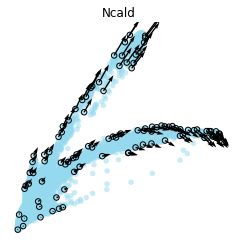

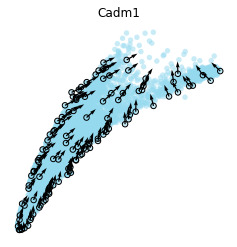

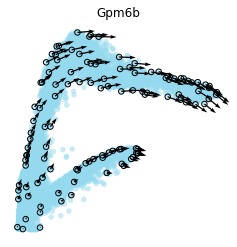

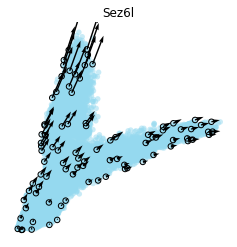

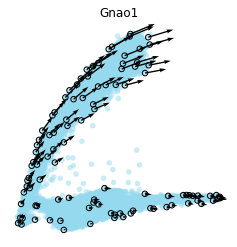

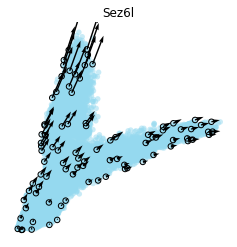

In [196]:
%autoreload 2
gene_samples=['Rimbp2', 'Diaph3', 'Klf7', 'Ncald', 'Cadm1', 'Gpm6b', 'Sez6l', 'Gnao1', 'Sez6l']

for gene in gene_samples:
    gene_list=[gene]
    ncols=1
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(4,height))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=None,
            colors=None,
            alpha=0.5, 
            s = 30,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')

    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cost_gene/'+gene_list[i]+'_arrow.png',dpi=300)
    plt.show()

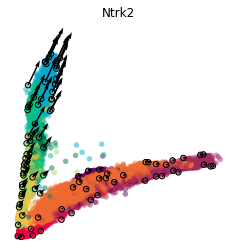

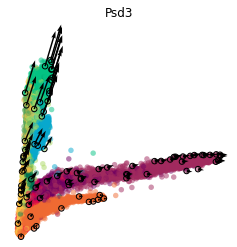

In [204]:
gene_samples=['Ntrk2']
for gene in gene_samples:
    gene_list=[gene]
    ncols=1
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(4,height))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=(0,1.8),
            colors=colormap.colormap_neuro,
            alpha=0.5, 
            s = 30,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')

    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cost_gene/'+gene_list[i]+'color_arrow.png',dpi=300)
    plt.show()

gene_samples=['Psd3']
for gene in gene_samples:
    gene_list=[gene]
    ncols=1
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(4,height))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=(0,1.2),
            colors=colormap.colormap_neuro,
            alpha=0.5, 
            s = 30,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')

    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cost_gene/'+gene_list[i]+'color_arrow.png',dpi=300)
    plt.show()

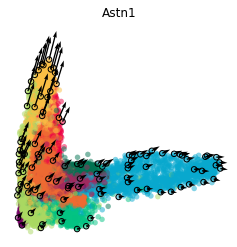

In [209]:

gene_samples=['Astn1']
for gene in gene_samples:
    gene_list=[gene]
    ncols=1
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(4,height))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            # custom_xlim=None,
            custom_ylim=(0.3,1.3),
            colors=colormap.colormap_neuro,
            alpha=0.5, 
            s = 30,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')

    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cost_gene/'+gene_list[i]+'color_arrow.png',dpi=300)
    plt.show()

In [28]:
import shutil
path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/all/'
des='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/loss500in_data0603/'
for i in loss_top500:
    try:
        shutil.copyfile((path+i+'.pdf'), (des+i+'.pdf'))
    except:
        print(i)


Chst8
Msn
Slc6a15


## Coumpute and visualize the prediction in embedding space

The prediction in the embedding space could be calculated with ```celldancer.compute_cell_velocity.compute()```. If not specified, all genes in cellDancer_df will be used to calculate the prediction in the embedding space. Following the method of [velocyto](https://velocyto.org/velocyto.py/index.html#) and [scVelo](https://scvelo.readthedocs.io/), we project the velocity vectors of the cells into the low-dimensional embedding space.

After the calculation, the predicted direction in the embedding space, i.e. columns 'velocity1' and 'velocity2' will be added to the original dataframe. ```cdplt.cell.scatter_cell()``` could be used to display the predicted direction in embedding space.

In [36]:
%autoreload 2

# Compute cell velocity
cellDancer_df=cd.compute_cell_velocity.compute(cellDancer_df=cellDancer_df)

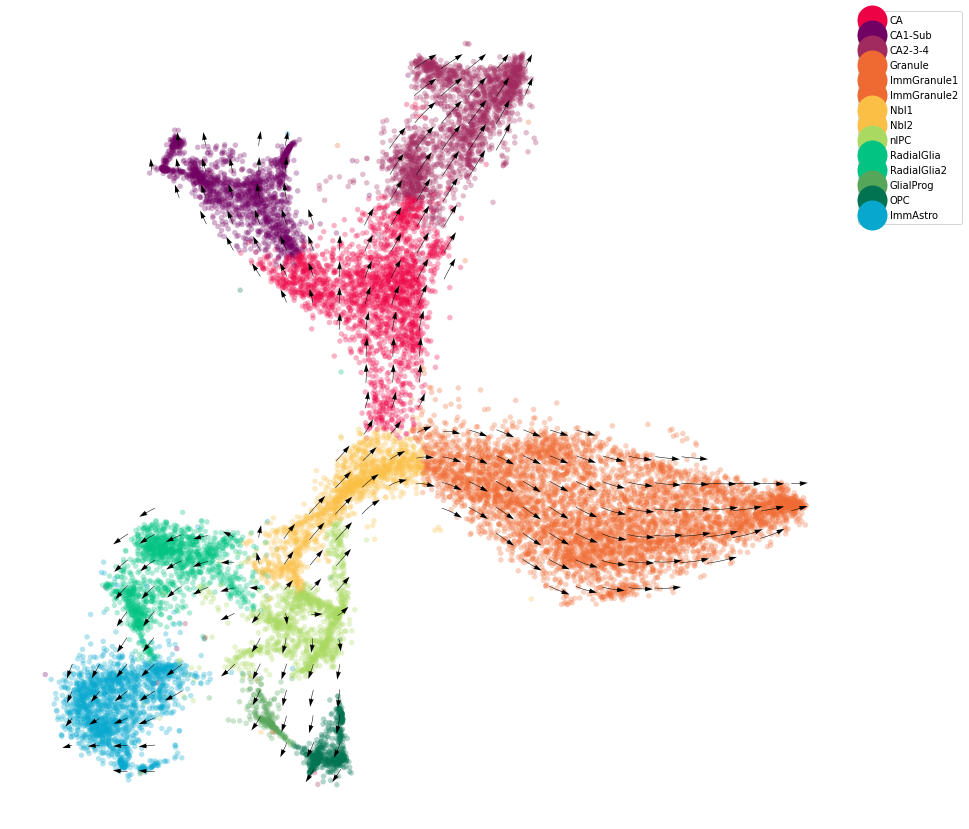

In [37]:
# Plot cell velocity
fig, ax = plt.subplots(figsize=(15,15))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_neuro, alpha=0.3, s=30,
             velocity=True, legend='on',min_mass=2,arrow_grid=(30,30))
ax.axis('off')
plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cell_velocity/cell_velocity.pdf')
plt.show()

## Estimate pseudotime

Based on the prediction in embedding space, the pseudotime could be estimated with ```cd.pseudo_time.pseudo_time()```.

In [38]:
%%capture
%autoreload 2

# Set parameters
dt = 0.001
t_total = {dt: 10000}
n_repeats = 10

cellDancer_df = cd.pseudo_time.pseudo_time(cellDancer_df=cellDancer_df, 
                                          grid=(20, 20), 
                                          dt=dt, 
                                          t_total=t_total[dt],
                                          n_repeats=n_repeats,
                                          speed_up=(60,60),
                                          n_paths = 5,
                                          psrng_seeds_diffusion=[i for i in range(n_repeats)],
                                          activate_umap_paths_divider=False,
                                          n_jobs=8)

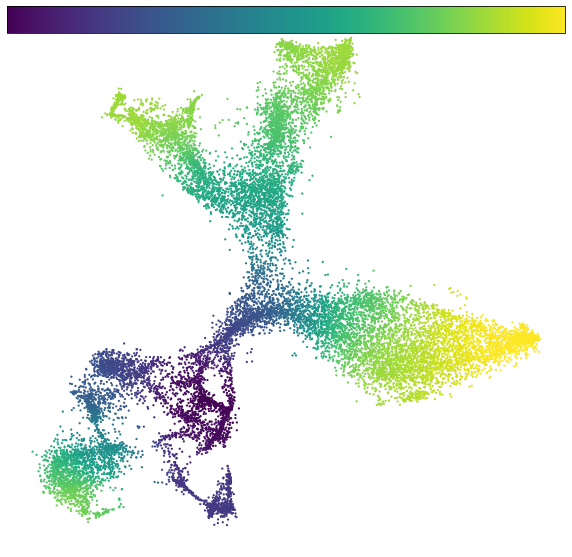

In [39]:
# Plot pseudotime
fig, ax = plt.subplots(figsize=(10,10))
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=1, velocity=False)
ax.axis('off')
plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/pseudotime/pseudotime.pdf')
plt.show()

### Pseudotime of gene

Let’s visualize the spliced RNA abundance of some sample genes based on pseudotime with ```celldancer.cdplt.gene.scatter_gene()```.

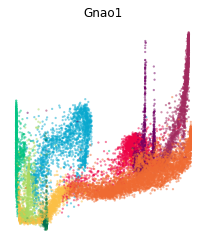

In [7]:
ncols=5
gene_list=['Psd3', 'Dcx', 'Syt11', 'Diaph3', 'Slc1a3', 'Gria1', 'Dctn3', 'Map1b', 'Camk2a', 'Gpm6b', 'Sez6l', 'Evl', 'Astn1', 'Ank2', 'Klf7', 'Tbc1d16', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Lhx9', 'Slc4a4', 'Ppfia2', 'Kcnip1', 'Ptpro', 'Ntrk2', 'Gnao1', 'Cadm1', 'Mef2c', 'Sptbn1', 'Ncald']

gene_list=['Psd3', 'Dcx', 'Syt11', 'Gria1', 'Map1b', 'Camk2a', 'Gpm6b', 'Tbc1d16', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Elavl4', 'Ntrk2', 'Mef2c', 'Ncald']
gene_list=['Gnao1']
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')
# plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/gene_pseudotime.png',dpi=300)



## Kinetics in embedding space

cellDancer provides other descriptive functions for visualization. In embedding space, we could visualize the alpha, beta, gamma, spliced reads, and unspliced reads with ```celldancer.cdplt.cell.scatter_cell()```. The specific genes could be analyzed based one the kinetics' plot. Taking Ntrk2 as an example, astrocytes and OPCs have high α and low β, resulting in high expression of unspliced Ntrk2. Dentate gyrus granule neurons and pyramidal neurons have high β and low γ, resulting in high expression of spliced Ntrk2.

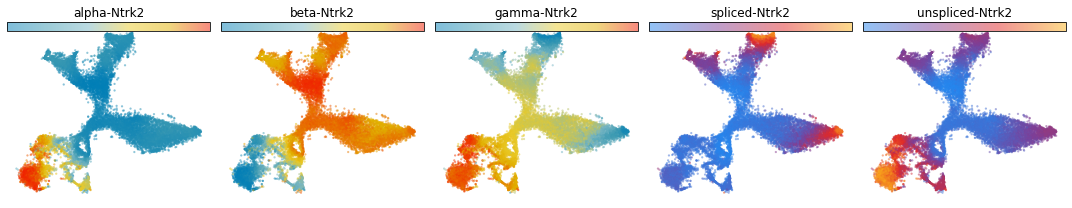

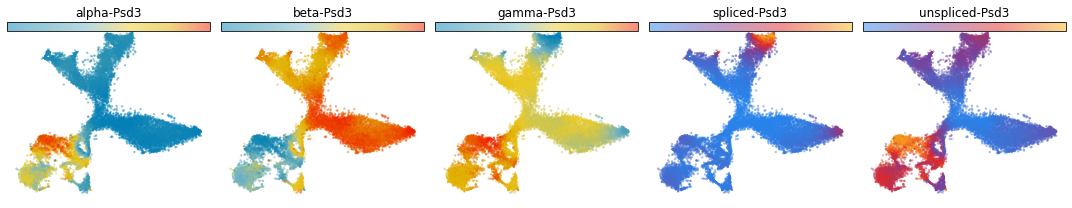

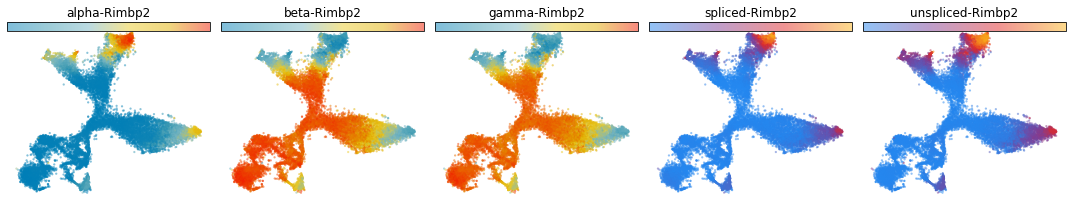

In [10]:
gene_samples=['Ntrk2','Psd3','Rimbp2']

for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='splice', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='unsplice', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

In [42]:
len(set(cellDancer_df.gene_name))

2156

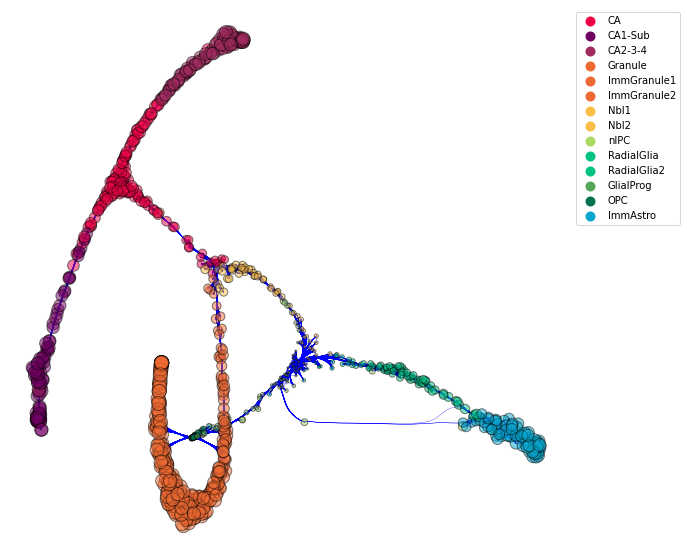

In [43]:
%autoreload 2

from celldancer.plotting.graph import graph
fig, ax= plt.subplots(figsize=(10,10))
graph(ax,
cellDancer_df,
node_layout='forcedirected',
use_edge_bundling=True,
node_colors=colormap.colormap_neuro,
edge_length=3,
node_sizes='pseudotime',
colorbar='on',
legend='on')

In [76]:
%load_ext autoreload
%autoreload 2

# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

# load the prediction result of all genes
cellDancer_df_file = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)

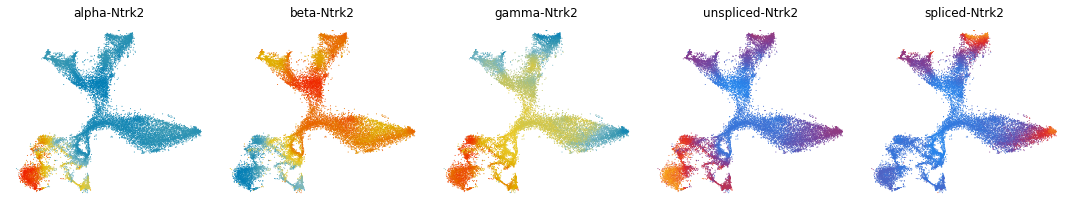

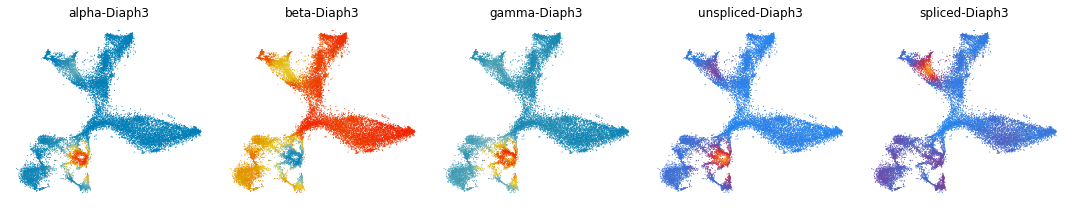

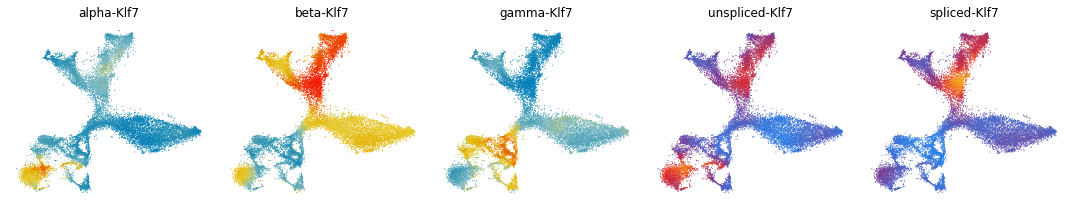

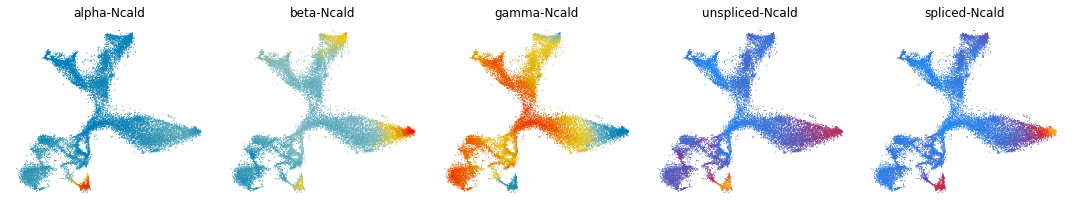

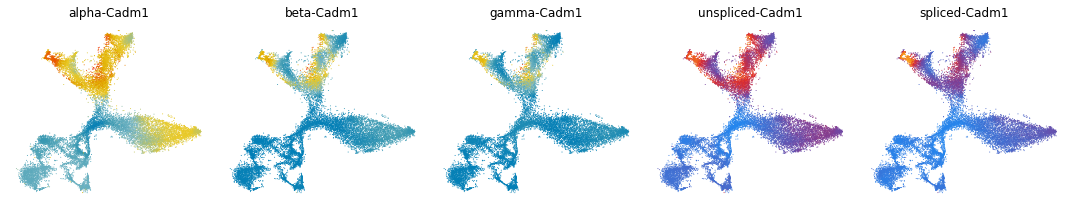

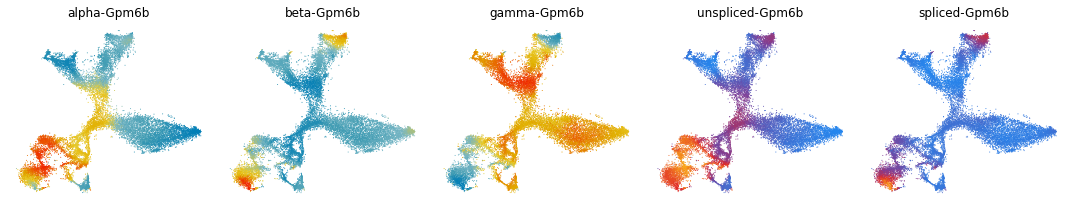

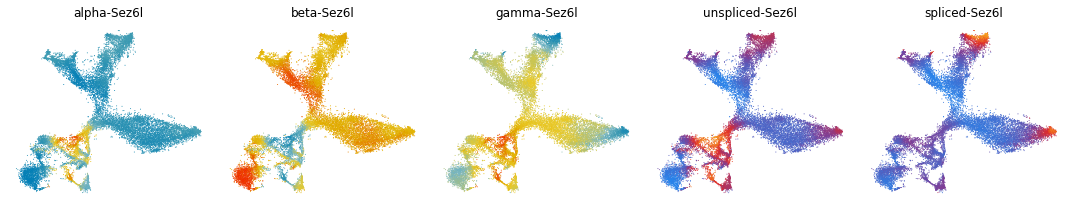

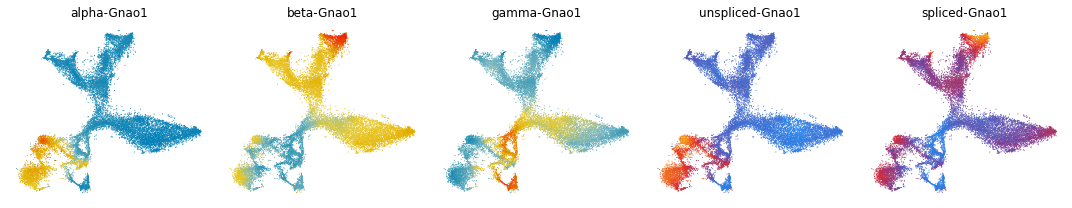

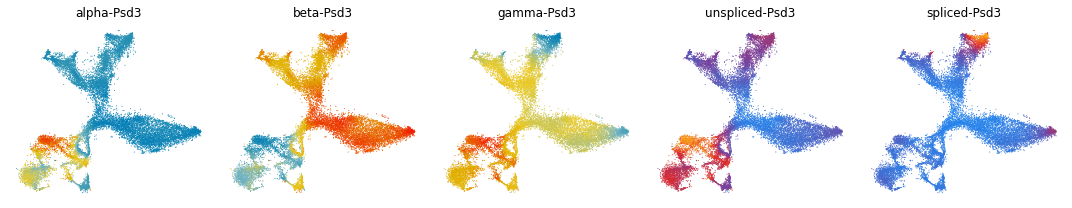

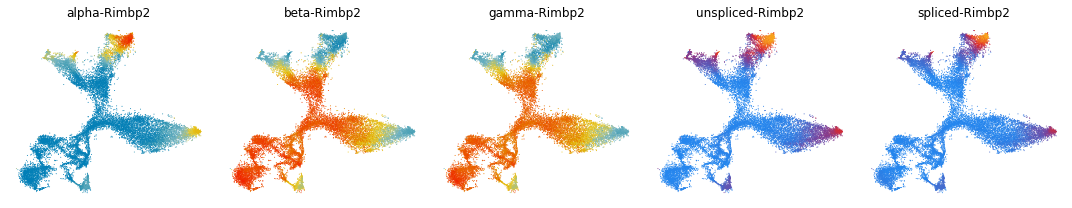

In [210]:
# gene_samples=['Psd3', 'Ncald', 'Klf7', 'Sez6l', 'Diaph3', 'Gnao1', 'Astn1']
gene_samples=['Ntrk2', 'Diaph3', 'Klf7', 'Ncald', 'Cadm1', 'Gpm6b', 'Sez6l', 'Gnao1', 'Psd3','Rimbp2']
# gene_samples=['Slc4a10']


for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False,colorbar=False,s=1,alpha=1)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False,colorbar=False,s=1,alpha=1)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False,colorbar=False,s=1,alpha=1)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='unsplice', 
                 gene=gene, velocity=False,colorbar=False,s=1,alpha=1)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='splice', 
                 gene=gene, velocity=False,colorbar=False,s=1,alpha=1)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('unspliced-'+gene)
    ax[4].set_title('spliced-'+gene)
    plt.tight_layout()
    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/cell_para/cell_para_'+gene+'.png',dpi=300)
    plt.show()

26


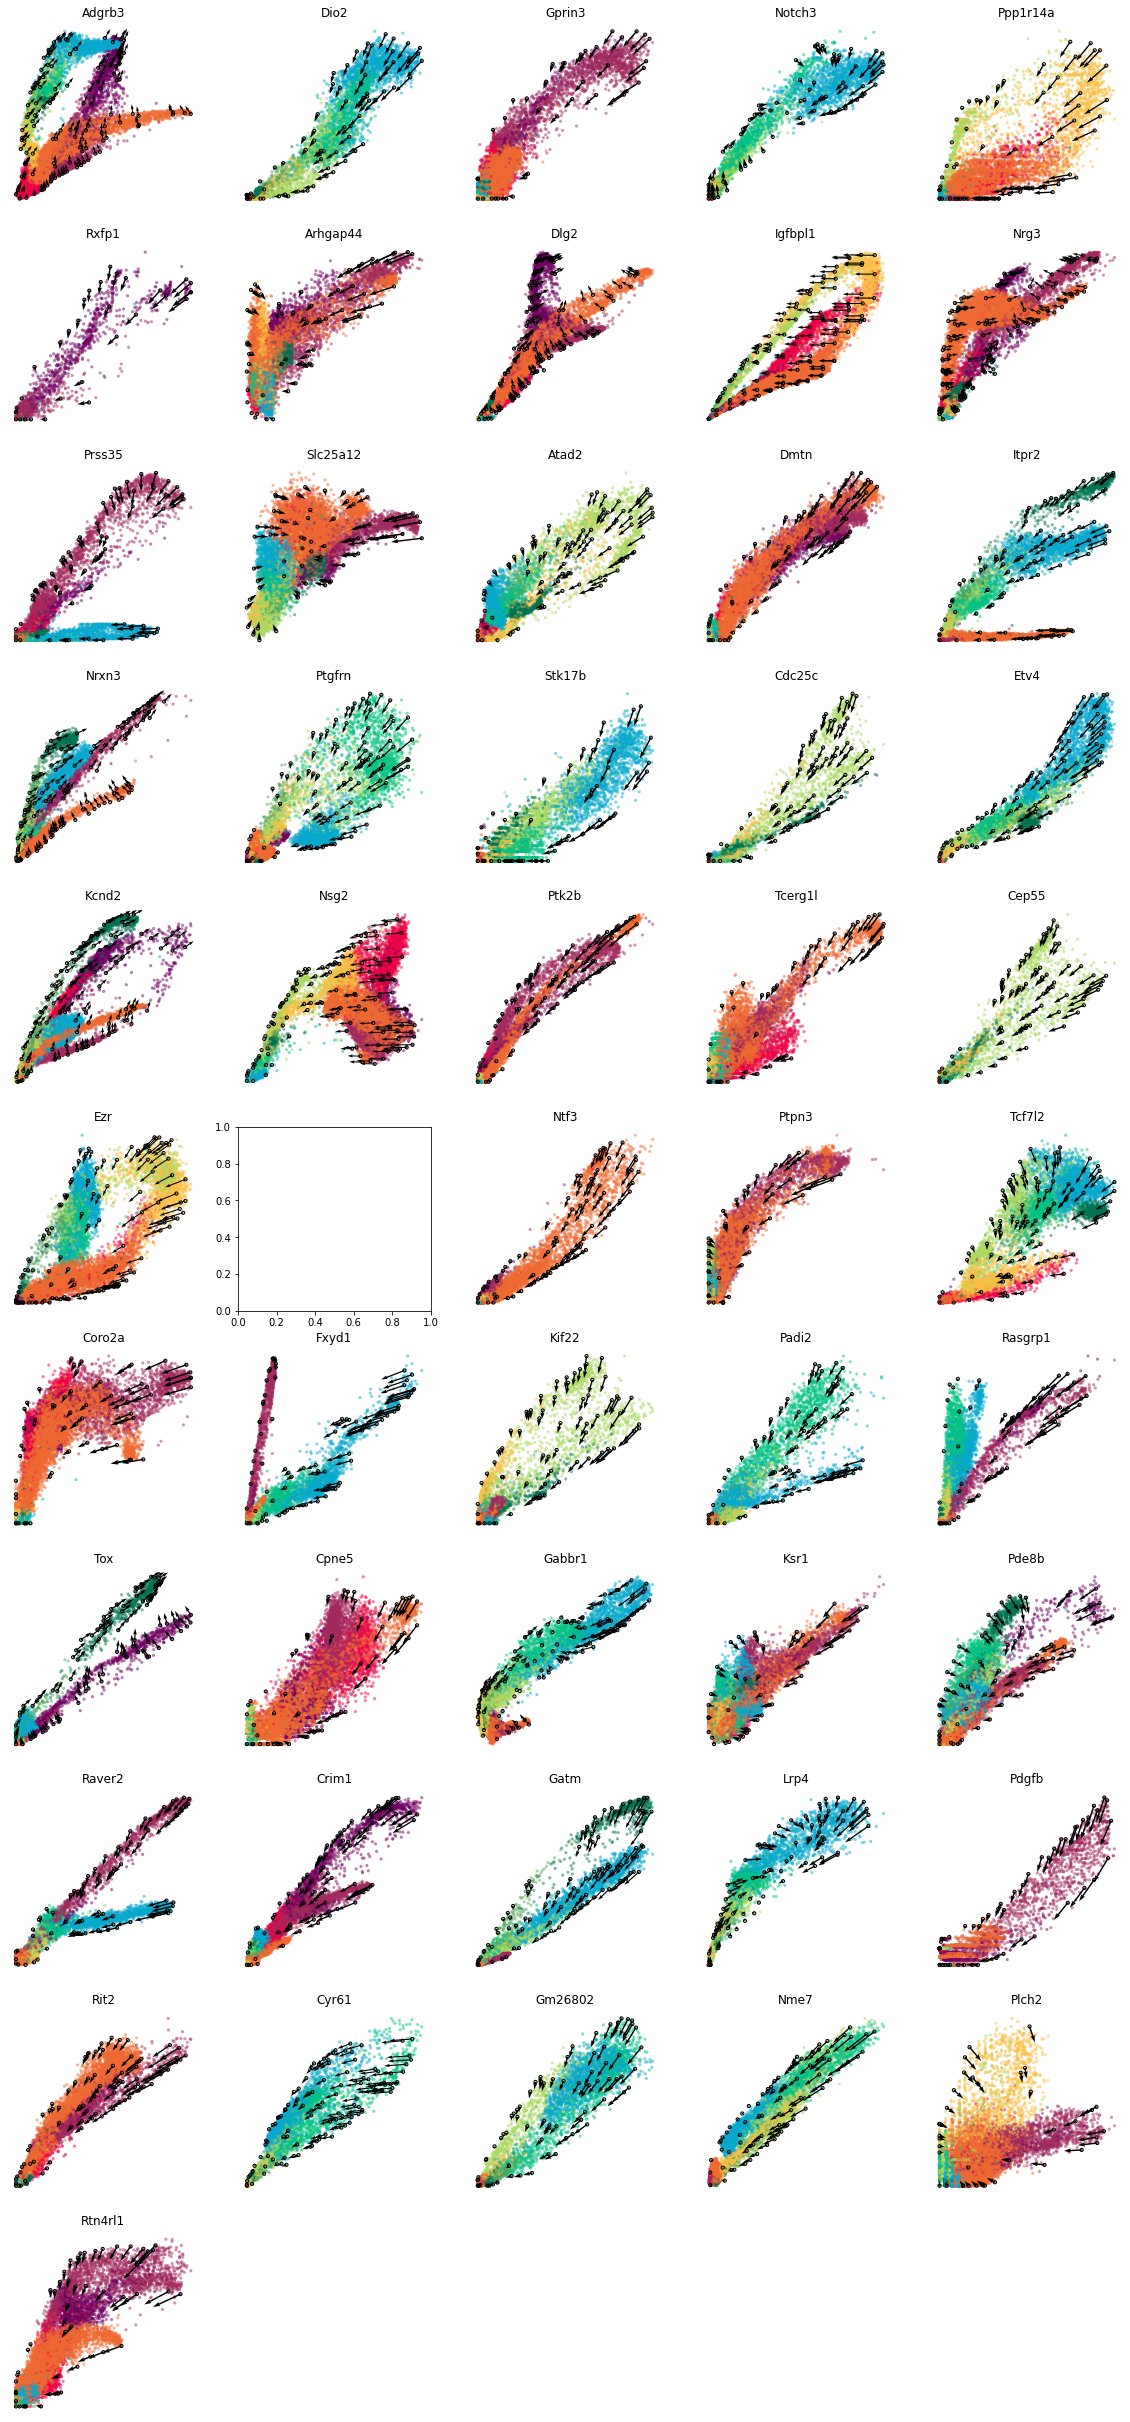

In [52]:
%autoreload 2
#picked in orig top 500
gene_list=['Adgrb3','Dio2','Gprin3','Notch3','Ppp1r14a','Rxfp1',
'Arhgap44','Dlg2','Igfbpl1','Nrg3','Prss35','Slc25a12',
'Atad2','Dmtn','Itpr2','Nrxn3','Ptgfrn','Stk17b',
'Cdc25c','Etv4','Kcnd2','Nsg2','Ptk2b','Tcerg1l',
'Cep55','Ezr',' Kcnq5','Ntf3','Ptpn3','Tcf7l2',
'Coro2a','Fxyd1','Kif22','Padi2','Rasgrp1','Tox',
'Cpne5','Gabbr1','Ksr1','Pde8b','Raver2',
'Crim1','Gatm','Lrp4','Pdgfb','Rit2',
'Cyr61','Gm26802','Nme7','Plch2','Rtn4rl1']


ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    try:
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=None,
            colors=colormap.colormap_neuro,
            alpha=0.5, 
            s = 10,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')
    except:print(i)
plt.show()

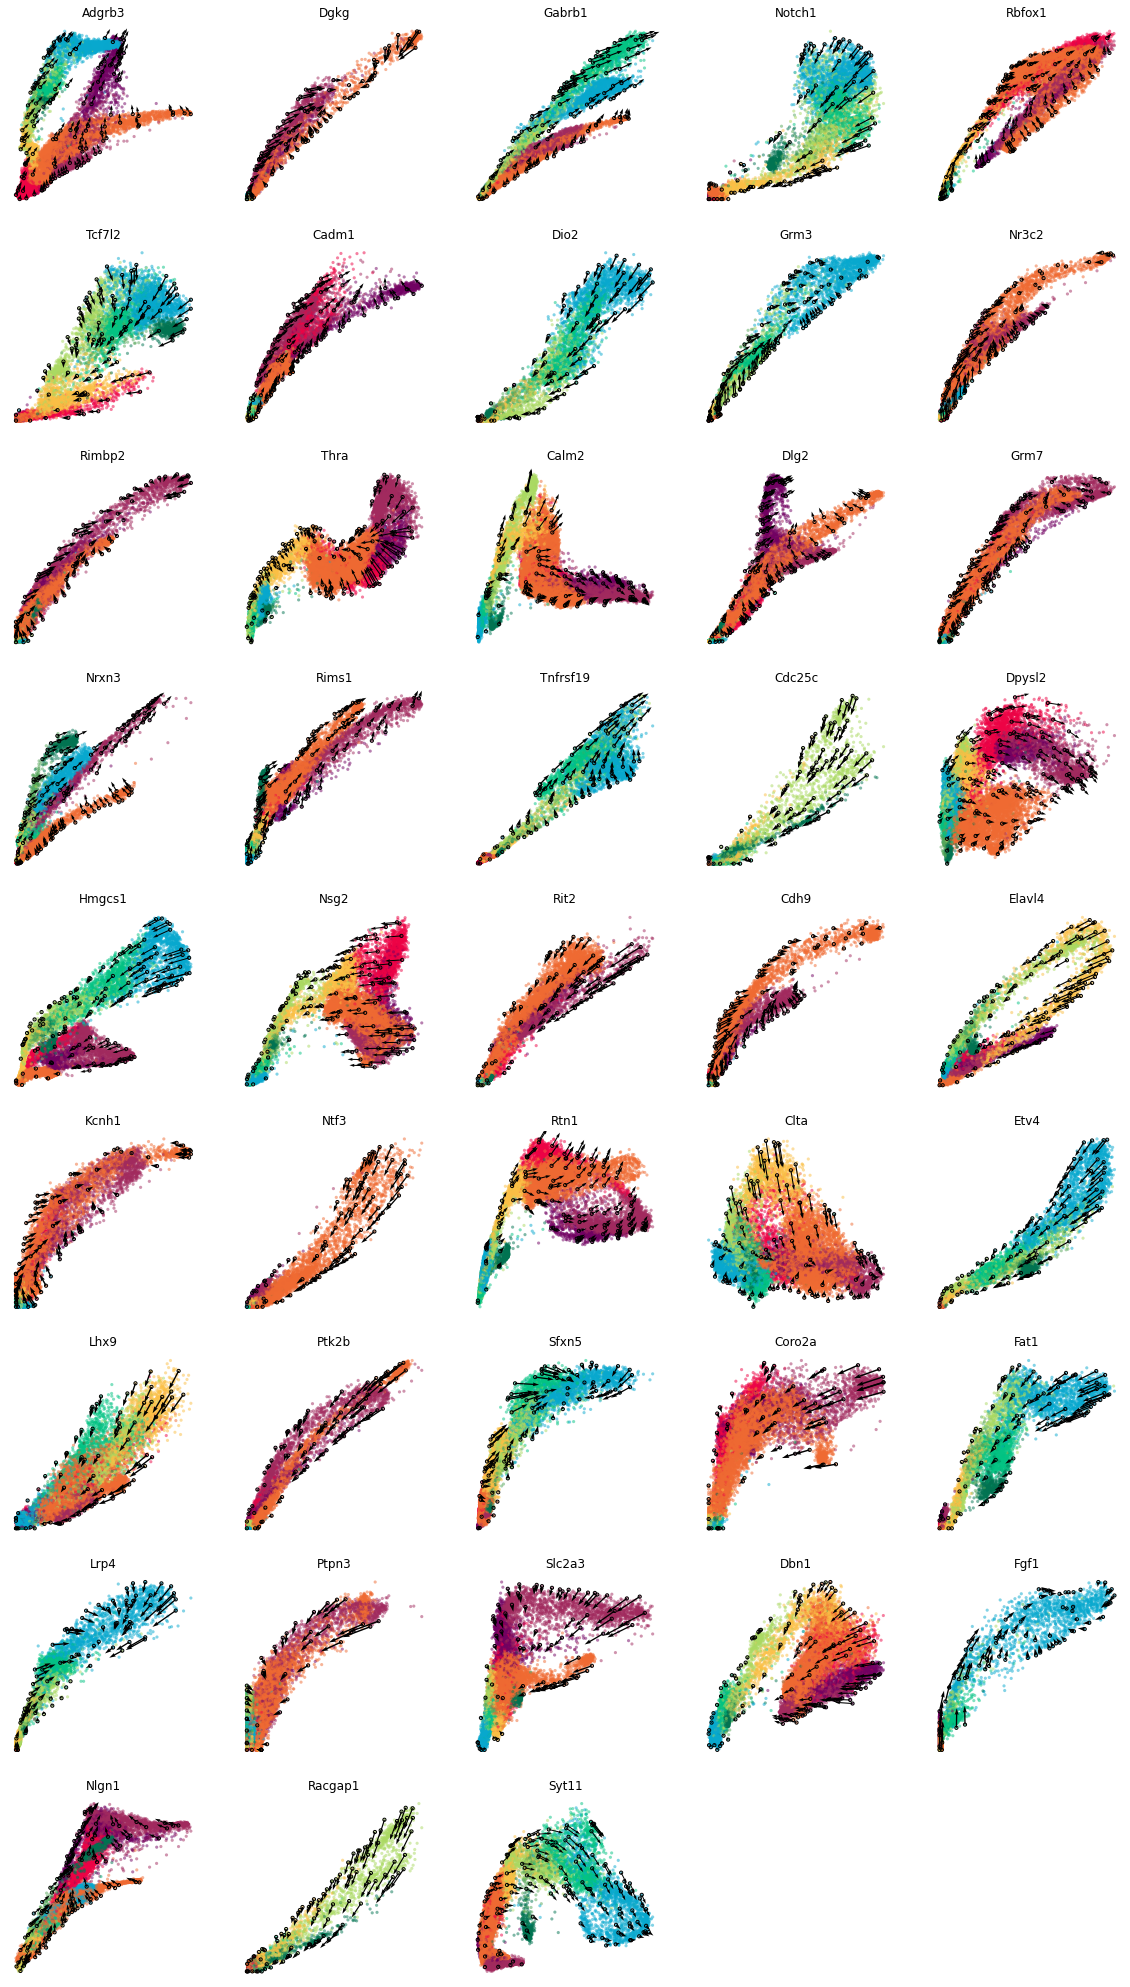

In [65]:
%autoreload 2
gene_list=['Adgrb3','Dgkg','Gabrb1','Notch1','Rbfox1','Tcf7l2',
'Cadm1','Dio2','Grm3','Nr3c2','Rimbp2','Thra',
'Calm2','Dlg2','Grm7','Nrxn3','Rims1','Tnfrsf19',
'Cdc25c','Dpysl2','Hmgcs1','Nsg2','Rit2',
'Cdh9','Elavl4','Kcnh1','Ntf3','Rtn1',
'Clta','Etv4','Lhx9','Ptk2b','Sfxn5',
'Coro2a','Fat1','Lrp4','Ptpn3','Slc2a3',
'Dbn1','Fgf1','Nlgn1','Racgap1','Syt11',]

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    try:
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=None,
            colors=colormap.colormap_neuro,
            alpha=0.5, 
            s = 10,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('off')
    except:print(i)
plt.show()

In [14]:
# load the prediction result of all genes
loss_file = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/loss.csv'
loss_df=pd.read_csv(loss_file)
loss_df

gene_name  epoch      loss
0        Pdzrn4      9  0.058603
1        Pdzrn4     19  0.063891
2        Pdzrn4     29  0.061014
3        Pdzrn4     39  0.067300
4       Adamts1      9  0.086625
...         ...    ...       ...
21319    Clec2l    159  0.038765
21320    Clec2l    169  0.046160
21321    Clec2l    179  0.045895
21322    Clec2l    189  0.031417
21323    Clec2l    199  0.037545

[21324 rows x 3 columns]

In [15]:
loss=cellDancer_df[['gene_name','loss']].drop_duplicates()

In [16]:
loss=loss.sort_values('loss')
loss.to_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/loss_rank.csv',index=False)

<AxesSubplot:ylabel='Density'>

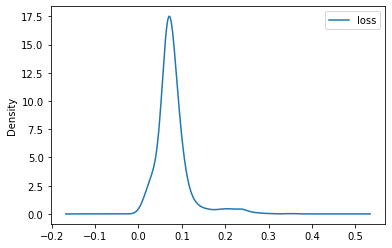

In [17]:
loss.plot.kde(bw_method=0.3)

In [19]:
loss_top500=list(loss.gene_name)[0:500]

In [28]:
import shutil
path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/all/'
des='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/loss500in_data0603/'
for i in loss_top500:
    try:
        shutil.copyfile((path+i+'.pdf'), (des+i+'.pdf'))
    except:
        print(i)


Chst8
Msn
Slc6a15


In [40]:
un_max

unsplice
gene_name              
0610007P14Rik  0.161750
0610040J01Rik  0.570356
1110017D15Rik  0.139663
1190002N15Rik  0.042227
1500009L16Rik  0.067341
...                 ...
Zmynd8         0.614660
Znhit1         0.068332
Zswim6         3.003690
Zwint          0.274154
Zyg11b         0.232855

[2159 rows x 1 columns]

In [62]:
def fig_sim(first_fig,second_fig):
    # Usage:
    #
    # python3 script.py --input original.png --output modified.png
    # Based on: https://github.com/mostafaGwely/Structural-Similarity-Index-SSIM-

    # 1. Import the necessary packages
    from skimage.measure import structural_similarity
    import argparse
    import imutils
    import cv2

    # 2. Construct the argument parse and parse the arguments
    ap = argparse.ArgumentParser()
    ap.add_argument("-f", "--first", required=True, help="Directory of the image that will be compared")
    ap.add_argument("-s", "--second", required=True, help="Directory of the image that will be used to compare")

    # 3. Load the two input images
    imageA = cv2.imread(first_fig)
    imageB = cv2.imread(second_fig)

    # 4. Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # 5. Compute the Structural Similarity Index (SSIM) between the two
    #    images, ensuring that the difference image is returned
    (score, diff) = structural_similarity(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # 6. You can print only the score if you want
    return(score)

In [63]:
all_genes=list(cellDancer_df_bkup.gene_name)

In [64]:

#for gene in all_genes:
first_fig='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/loss500in_data0603/Ngef.pdf'
second_fig='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/cost_v1_all_gene_denGyrLr0.001Costv1C1r0.5C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdam/gene_velocity/celldancer_all_gene/loss500in_data0603/Ngfrap1.pdf'
score=fig_sim(first_fig,second_fig)

ImportError: cannot import name 'structural_similarity' from 'skimage.measure' (/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/skimage/measure/__init__.py)

In [61]:
from skimage import measure
skimage.metrics.skimage

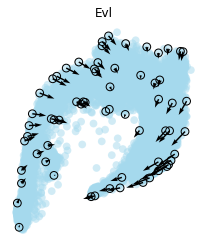

In [26]:
%autoreload 2
gene_list=['Evl']


test_colormap={'CA': '#A5D9ED',
 'CA1-Sub': '#A5D9ED',
 'CA2-3-4': '#A5D9ED',
 'Granule': '#A5D9ED',
 'ImmGranule1': '#A5D9ED',
 'ImmGranule2': '#A5D9ED',
 'Nbl1': '#A5D9ED',
 'Nbl2': '#A5D9ED',
 'nIPC': '#A5D9ED',
 'RadialGlia': '#A5D9ED',
 'RadialGlia2': '#A5D9ED',
 'GlialProg': '#A5D9ED',
 'OPC': '#A5D9ED',
 'ImmAstro': '#A5D9ED'}

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    try:
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=None,
            colors=test_colormap,
            alpha=0.5, 
            s = 60,
            velocity=True,
            gene=gene_list[i],
            arrow_grid=(10,10)
        )

        ax.set_title(gene_list[i])
        ax.axis('off')
    except:print(i)
plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/storyboard/Evl_rerun_njob1.pdf')
plt.show()

{'CA': '#ed0345',
 'CA1-Sub': '#710162',
 'CA2-3-4': '#a12a5e',
 'Granule': '#ef6a32',
 'ImmGranule1': '#ef6a32',
 'ImmGranule2': '#ef6a32',
 'Nbl1': '#fbbf45',
 'Nbl2': '#fbbf45',
 'nIPC': '#aad962',
 'RadialGlia': '#03c383',
 'RadialGlia2': '#03c383',
 'GlialProg': '#56A65A',
 'OPC': '#017351',
 'ImmAstro': '#08A8CE'}

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-25-10 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]                                                                                              
                                                                                                                                                                

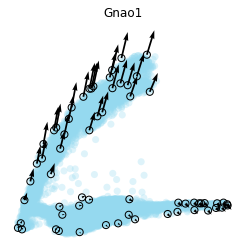

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-25-22 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]                                                                                              
                                                                                                                                                                

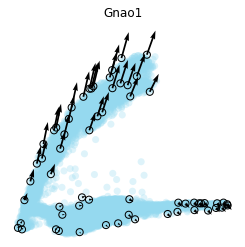

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-25-31 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]                                                                                              
                                                                                                                                                                

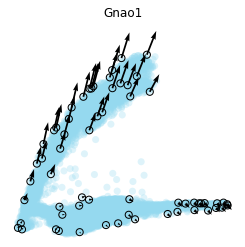

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-25-41 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]                                                                                              
                                                                                                                                                                

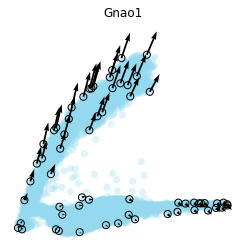

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-25-51 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]                                                                                              
                                                                                                                                                                

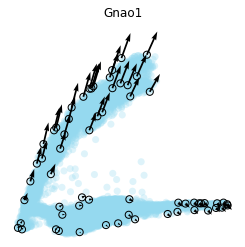

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-26-00 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]                                                                                              
                                                                                                                                                                

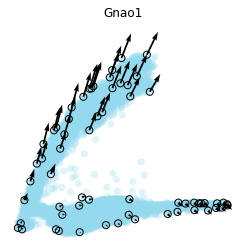

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-26-10 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]                                                                                              
                                                                                                                                                                

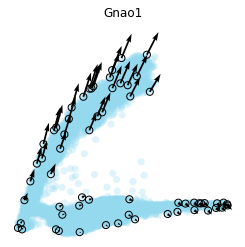

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-26-21 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]                                                                                              
                                                                                                                                                                

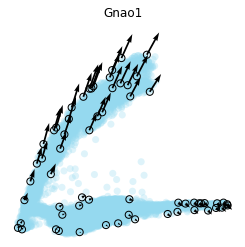

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-26-33 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]                                                                                              
                                                                                                                                                                

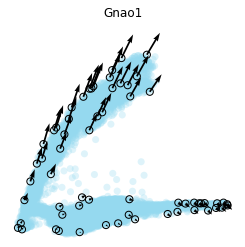

In [48]:
gene_list=['Gpm6b', 'Gnao1'][1:]
max_epoches_list=[2,50,100,200]
max_epoches_list=[2,3,4,5,6,7,8,9,10]
for max_epoches in max_epoches_list:
    
    loss_df, cellDancer_df=cd.velocity_estimation.velocity(cell_type_u_s,\
                                                           max_epoches=max_epoches,\
                                                           check_val_every_n_epoch=1,\
                                                           gene_list=gene_list,\
                                                           permutation_ratio=0.1,\
                                                           norm_u_s=False,\
                                                           norm_cell_distribution=False,
                                                           n_jobs=8,
                                                          patience=999)

    ncols=5
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(24,height))
    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=(0.2,3),
            colors=None,#,colormap.colormap_neuro,
            alpha=0.3, 
            s = 50,
            velocity=True,
            gene=gene_list[i],
            arrow_grid=(10,10)
            )

        ax.set_title(gene_list[i])
        ax.axis('off')
    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/storyboard_training_gene_step_by_step/'+str(max_epoches)+'.pdf')
    plt.show()

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-26-58 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]                                                                                              
                                                                                                                                                                

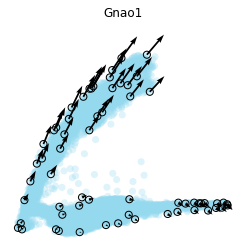

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-27-06 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]                                                                                              
                                                                                                                                                                

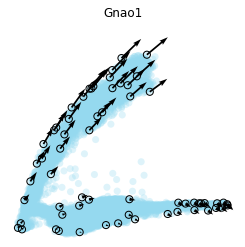

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-27-15 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]                                                                                              
                                                                                                                                                                

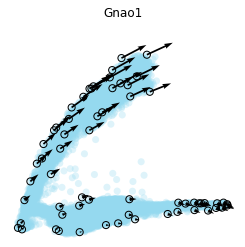

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-27-26 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:04<00:00,  4.76s/it]                                                                                              
                                                                                                                                                                

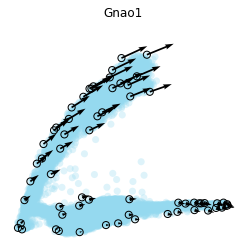

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 18-27-38 as the output path.
Arranging genes for parallel job.
1  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]                                                                                              
                                                                                                                                                                

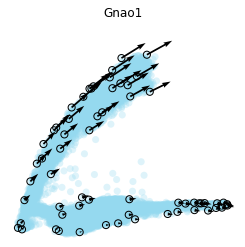

In [49]:
gene_list=['Gpm6b', 'Gnao1'][1:]
max_epoches_list=[15,20,30,40,50]
for max_epoches in max_epoches_list:
    
    loss_df, cellDancer_df=cd.velocity_estimation.velocity(cell_type_u_s,\
                                                           max_epoches=max_epoches,\
                                                           check_val_every_n_epoch=1,\
                                                           gene_list=gene_list,\
                                                           permutation_ratio=0.1,\
                                                           norm_u_s=False,\
                                                           norm_cell_distribution=False,
                                                           n_jobs=8,
                                                          patience=999)

    ncols=5
    height=math.ceil(len(gene_list)/ncols)*4
    fig = plt.figure(figsize=(24,height))
    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=(0.2,3),
            colors=None,#,colormap.colormap_neuro,
            alpha=0.3, 
            s = 50,
            velocity=True,
            gene=gene_list[i],
            arrow_grid=(10,10)
            )

        ax.set_title(gene_list[i])
        ax.axis('off')
    plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/storyboard_training_gene_step_by_step/'+str(max_epoches)+'.pdf')
    plt.show()

In [12]:
%autoreload 2

gene_list=['Psd3', 'Dcx', 'Syt11', 'Diaph3', 'Slc1a3', 'Gria1', 'Dctn3', 'Map1b', 'Camk2a', 'Gpm6b', 'Sez6l', 'Evl', 'Astn1', 'Ank2', 'Klf7', 'Tbc1d16', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Lhx9', 'Slc4a4', 'Ppfia2', 'Kcnip1', 'Ptpro', 'Ntrk2', 'Gnao1', 'Cadm1', 'Mef2c', 'Sptbn1', 'Ncald']

loss_df, cellDancer_df=cd.velocity_estimation.velocity(cell_type_u_s,\
                                                       max_epoches=2,\
                                                       check_val_every_n_epoch=1,\
                                                       gene_list=gene_list,\
                                                       permutation_ratio=0.1,\
                                                       norm_u_s=False,\
                                                       norm_cell_distribution=False,
                                                       n_jobs=8)
cellDancer_df


Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-06-14 15-41-02 as the output path.
Arranging genes for parallel job.
30  genes were arranged to  4  portions.



Velocity Estimation: 100%|██████████| 4/4 [01:19<00:00, 18.77s/it]              
                                                                                

cellIndex gene_name  unsplice    splice  unsplice_predict  \
0               0      Klf7  0.408467  1.294797          0.302637   
1               1      Klf7  0.379136  1.256870          0.272417   
2               2      Klf7  0.893599  3.395004          0.503181   
3               3      Klf7  0.640505  2.739187          0.358852   
4               4      Klf7  0.662303  2.433943          0.405412   
...           ...       ...       ...       ...               ...   
544195      18135    Kcnip1  0.018745  0.005679          0.105887   
544196      18136    Kcnip1  0.148039  0.093618          0.298053   
544197      18137    Kcnip1  0.080708  0.032079          0.201327   
544198      18138    Kcnip1  0.078976  0.033418          0.197254   
544199      18139    Kcnip1  0.050686  0.019074          0.152202   

        splice_predict     alpha      beta     gamma      loss  \
0             1.461449  0.147284  0.878758  0.019801  0.152332   
1             1.411628  0.121244  0.882752  0.020024  0.152332   
2             3.816581  0.074657  0.957356  0.003634  0.152332   
3             3.035969  0.046405  0.951921  0.005895  0.152332   
4             2.732294  0.102651  0.930740  0.008106  0.152332   
...                ...       ...       ...       ...       ...   
544195        0.004997  0.186829  0.669234  2.449211  0.086258   
544196        0.027758  0.397847  0.660769  2.451872  0.086258   
544197        0.019506  0.294547  0.660515  2.445668  0.086258   
544198        0.018637  0.288765  0.661072  2.446906  0.086258   
544199        0.012566  0.236707  0.664366  2.447821  0.086258   

                           cellID     clusters  embedding1  embedding2  
0       10X83_2:AAACGGGGTCTCTTTAx  ImmGranule2   18.931086   -1.862429  
1       10X83_2:AACCATGGTTCAACCAx  ImmGranule2   18.419891   -1.282895  
2       10X83_2:AACACGTTCTGAAAGAx      CA2-3-4    2.369887   16.868419  
3       10X83_2:AAAGATGCATTGAGCTx           CA   -5.351040   10.676485  
4       10X83_2:AACCATGTCTACTTACx      CA1-Sub   -6.189126   11.754900  
...                           ...          ...         ...         ...  
544195  10X84_3:TTTCCTCCACCATCCTx  ImmGranule1   10.812611   -2.487668  
544196  10X84_3:TTTGTCACATGAAGTAx      CA2-3-4    8.246204   23.482788  
544197  10X84_3:TTTCCTCCACGGTAAGx         nIPC   -3.441272   -4.917364  
544198  10X84_3:TTTGTCAAGCGTCAAGx  ImmGranule2   16.394199   -6.143549  
544199  10X84_3:TTTCCTCGTGAAAGAGx  ImmGranule2   17.490857   -4.130190  

[544200 rows x 14 columns]